In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv("sales_data_with_discounts.csv",index_col=1)

In [3]:
data.head()

,Date,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
Day,,,,,,,,,,,,
Thursday,01-04-2021,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
Thursday,01-04-2021,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
Thursday,01-04-2021,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
Thursday,01-04-2021,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
Thursday,01-04-2021,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [4]:
data.dtypes

Date                  object
SKU                   object
City                  object
Volume                 int64
BU                    object
Brand                 object
Model                 object
Avg Price              int64
Total Sales Value      int64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object

In [5]:
# numerical column = {Volume,Avg Price,Total Sales Value}
data.isnull().sum()

Date                 0
SKU                  0
City                 0
Volume               0
BU                   0
Brand                0
Model                0
Avg Price            0
Total Sales Value    0
Discount Rate (%)    0
Discount Amount      0
Net Sales Value      0
dtype: int64

In [6]:
# there is no null value/missing value so we don't need to impute mean,median,mode

DATA VISUALIZATION - finding the relationship between numerical and categorical data

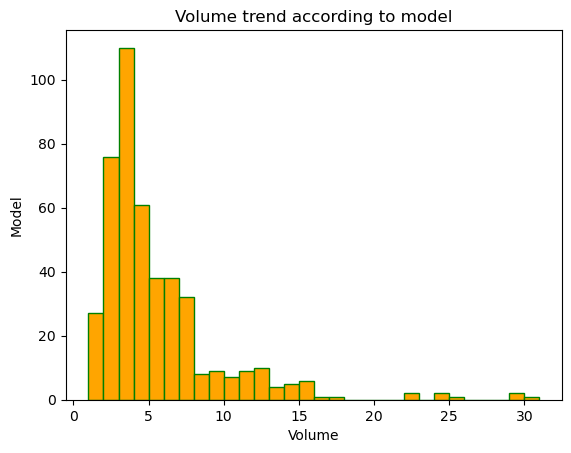

In [7]:
# Histogram 
plt.hist(data["Volume"],bins=30,color="orange",edgecolor = "green")
plt.xlabel("Volume")
plt.ylabel("Model")
plt.title("Volume trend according to model")
plt.show()

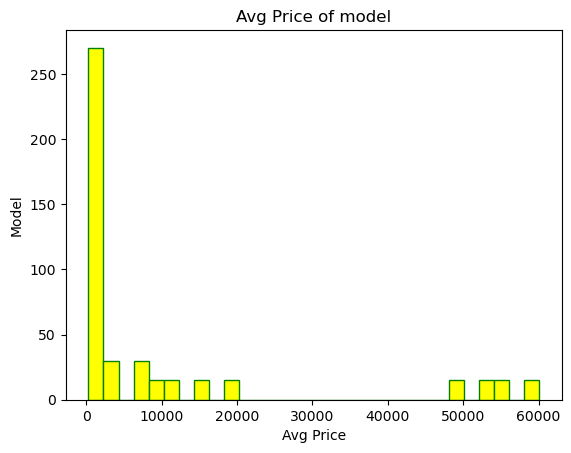

In [8]:
plt.hist(data["Avg Price"],bins=30,color="yellow",edgecolor = "green")
plt.xlabel("Avg Price")
plt.ylabel("Model")
plt.title("Avg Price of model")
plt.show()

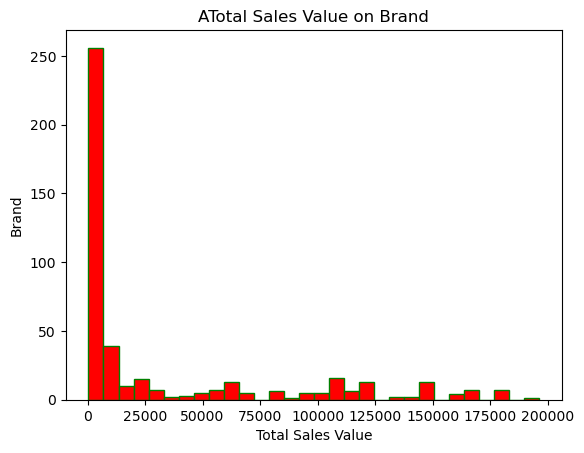

In [9]:
plt.hist(data["Total Sales Value"],bins=30,color="Red",edgecolor = "green")
plt.xlabel("Total Sales Value")
plt.ylabel("Brand")
plt.title("ATotal Sales Value on Brand")
plt.show()

In [10]:
data["Avg Price"].skew()

1.9088730767759727

In [11]:
numerical_data = data.select_dtypes(include='number')
print(numerical_data)

          Volume  Avg Price  Total Sales Value  Discount Rate (%)  \
Day                                                                 
Thursday      15      12100             181500          11.654820   
Thursday      10      10100             101000          11.560498   
Thursday       7      16100             112700           9.456886   
Thursday       6      20100             120600           6.935385   
Thursday       3       8100              24300          17.995663   
...          ...        ...                ...                ...   
Thursday       2       1300               2600          15.475687   
Thursday       6       2600              15600          17.057027   
Thursday       2       1600               3200          18.965550   
Thursday       3       1900               5700          16.793014   
Thursday       1       3100               3100          15.333300   

          Discount Amount  Net Sales Value  
Day                                         
Thursday    

In [12]:
categorical_data = data.select_dtypes(include='object')
print(categorical_data)

                Date  SKU City         BU  Brand       Model
Day                                                         
Thursday  01-04-2021  M01    C    Mobiles  RealU       RU-10
Thursday  01-04-2021  M02    C    Mobiles  RealU   RU-9 Plus
Thursday  01-04-2021  M03    C    Mobiles   YouM       YM-99
Thursday  01-04-2021  M04    C    Mobiles   YouM  YM-99 Plus
Thursday  01-04-2021  M05    C    Mobiles   YouM      YM-98 
...              ...  ...  ...        ...    ...         ...
Thursday  15-04-2021  L06    C  Lifestyle  Jeera   M-Casuals
Thursday  15-04-2021  L07    C  Lifestyle   Viva   W-Western
Thursday  15-04-2021  L08    C  Lifestyle   Viva    W-Lounge
Thursday  15-04-2021  L09    C  Lifestyle  Jeera   M-Formals
Thursday  15-04-2021  L10    C  Lifestyle  Jeera     M-Shoes

[450 rows x 6 columns]


In [13]:
data.dtypes

Date                  object
SKU                   object
City                  object
Volume                 int64
BU                    object
Brand                 object
Model                 object
Avg Price              int64
Total Sales Value      int64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object

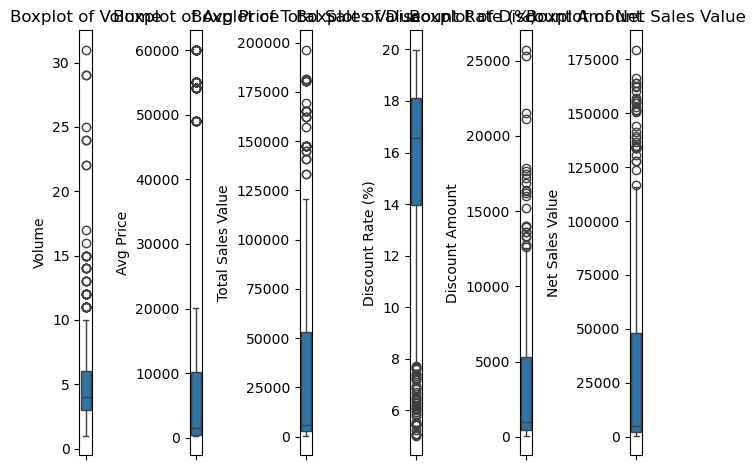

In [14]:
# Create boxplots for each numerical variablplt.figure(figsize=(15, 6))
for i, column in enumerate(numerical_data.columns, 1):
    plt.subplot(1, len(numerical_data.columns), i)
    sns.boxplot(y=numerical_data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [15]:
# IQR analysis and outlier detection
print("\n--- IQR & Outlier Summary ---")
for column in numerical_data.columns:
    Q1 = numerical_data[column].quantile(0.25)
    Q3 = numerical_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = numerical_data[(numerical_data[column] < lower_bound) | (numerical_data[column] > upper_bound)][column]
    
    print(f"\nColumn: {column}")
    print(f"  Q1: {Q1:.2f}")
    print(f"  Q3: {Q3:.2f}")
    print(f"  IQR: {IQR:.2f}")
    print(f"  Lower Bound: {lower_bound:.2f}")
    print(f"  Upper Bound: {upper_bound:.2f}")
    print(f"  Number of Outliers: {outliers.count()}")
    if not outliers.empty:
        print(f"  Outlier Values: {outliers.values}")



--- IQR & Outlier Summary ---

Column: Volume
  Q1: 3.00
  Q3: 6.00
  IQR: 3.00
  Lower Bound: -1.50
  Upper Bound: 10.50
  Number of Outliers: 44
  Outlier Values: [15 13 11 29 13 24 14 12 25 15 11 15 14 12 12 12 22 11 11 12 12 14 11 11
 15 31 12 16 24 11 12 12 22 11 13 15 12 14 14 11 29 15 13 17]

Column: Avg Price
  Q1: 465.00
  Q3: 10100.00
  IQR: 9635.00
  Lower Bound: -13987.50
  Upper Bound: 24552.50
  Number of Outliers: 60
  Outlier Values: [49100 54100 55100 60100 49100 54100 55100 60100 49100 54100 55100 60100
 49100 54100 55100 60100 49100 54100 55100 60100 49100 54100 55100 60100
 49100 54100 55100 60100 49100 54100 55100 60100 49100 54100 55100 60100
 49100 54100 55100 60100 49100 54100 55100 60100 49100 54100 55100 60100
 49100 54100 55100 60100 49100 54100 55100 60100 49100 54100 55100 60100]

Column: Total Sales Value
  Q1: 2700.00
  Q3: 53200.00
  IQR: 50500.00
  Lower Bound: -73050.00
  Upper Bound: 128950.00
  Number of Outliers: 36
  Outlier Values: [181500 147300

Bar Chart Analysis for Categorical Column:

In [16]:
data.dtypes

Date                  object
SKU                   object
City                  object
Volume                 int64
BU                    object
Brand                 object
Model                 object
Avg Price              int64
Total Sales Value      int64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object

Standardization of Numerical Variables

In [17]:
# Copy original numerical data for comparison
original_df = numerical_data.copy()

In [18]:
# Standardization using z-score formula
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
standardized_array = scaler.fit_transform(numerical_data)
standardized_df = pd.DataFrame(standardized_array, columns=numerical_data.columns)

In [19]:
# Print before and after standardization
original_df

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
Day,,,,,,
Thursday,15,12100,181500,11.654820,21153.498820,160346.501180
Thursday,10,10100,101000,11.560498,11676.102961,89323.897039
Thursday,7,16100,112700,9.456886,10657.910157,102042.089843
Thursday,6,20100,120600,6.935385,8364.074702,112235.925298
Thursday,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
Thursday,2,1300,2600,15.475687,402.367873,2197.632127
Thursday,6,2600,15600,17.057027,2660.896242,12939.103758
Thursday,2,1600,3200,18.965550,606.897606,2593.102394


In [20]:
standardized_df

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595
...,...,...,...,...,...,...
445,-0.725512,-0.506840,-0.618334,0.076009,-0.653541,-0.610461
446,0.220808,-0.434857,-0.360801,0.451097,-0.152191,-0.378500
447,-0.725512,-0.490229,-0.606448,0.903793,-0.608140,-0.601921
448,-0.488932,-0.473617,-0.556923,0.388474,-0.530379,-0.555499


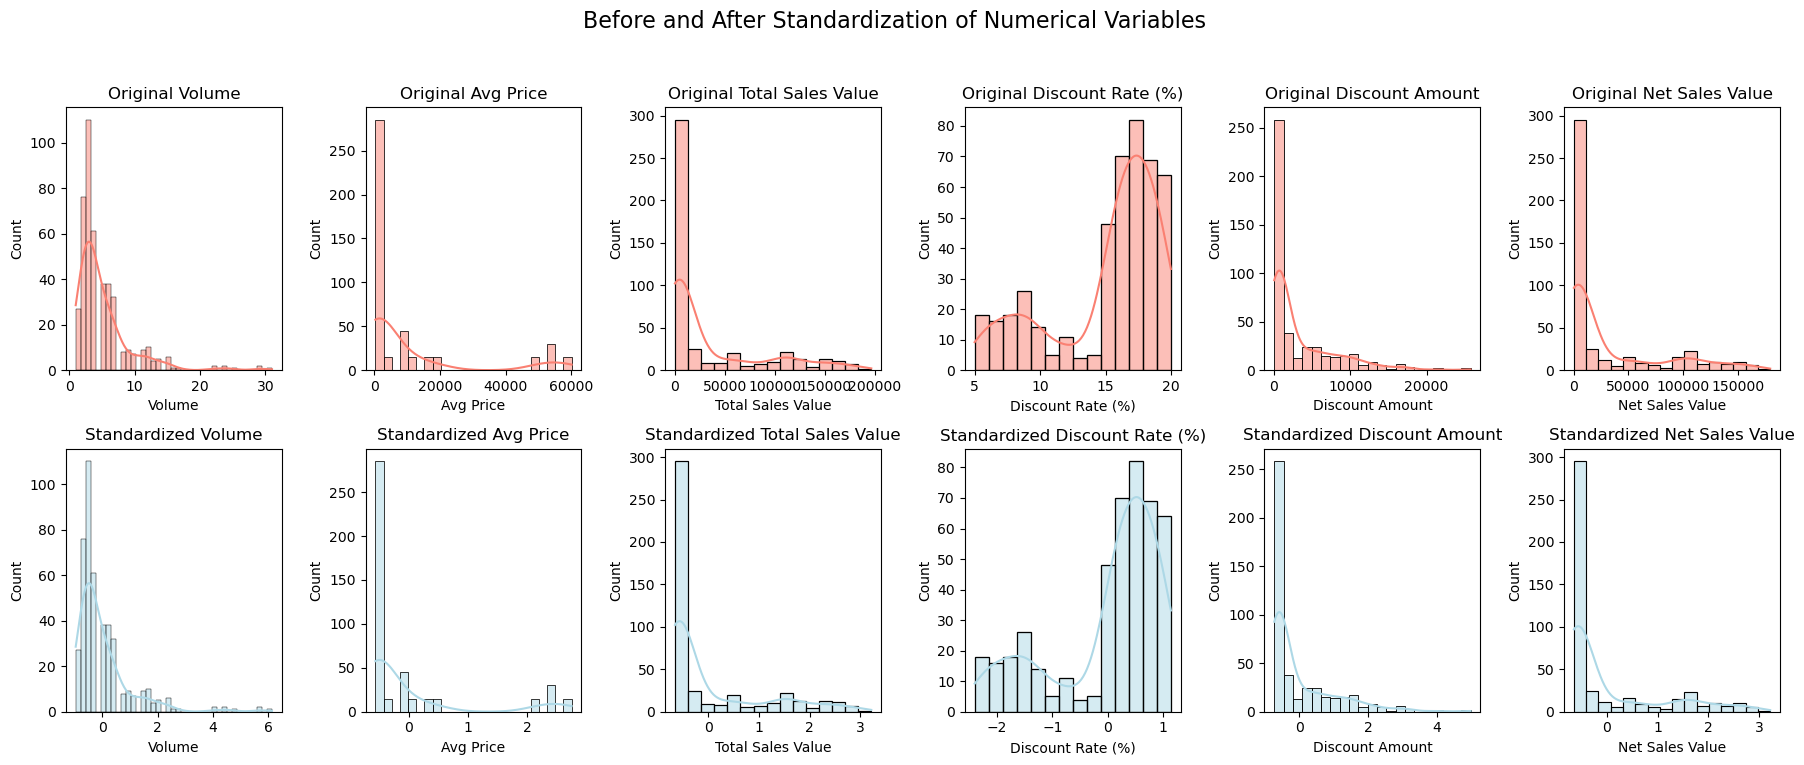

In [21]:
#  Visualize Before vs After Standardization
fig, axes = plt.subplots(2, len(numerical_data.columns), figsize=(18, 8))
fig.suptitle("Before and After Standardization of Numerical Variables", fontsize=16)
for i, col in enumerate(numerical_data.columns):
    # Original - before 
    sns.histplot(original_df[col], kde=True, ax=axes[0, i], color='salmon')
    axes[0, i].set_title(f"Original {col}")
    # Standardized - after
    sns.histplot(standardized_df[col], kde=True, ax=axes[1, i], color='lightblue')
    axes[1, i].set_title(f"Standardized {col}")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Conversion of Categorical Data into Dummy Variables

In [22]:
# Handle Boolean columns and convert to integers
boolean_columns = data.select_dtypes(include='bool').columns
for col in boolean_columns:
    data[col] = data[col].astype(int)

In [23]:
# Apply One-Hot Encoding to the categorical columns
data_encoded = pd.get_dummies(data, columns=boolean_columns, drop_first=False)

In [24]:
data_encoded

,Date,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
Day,,,,,,,,,,,,
Thursday,01-04-2021,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
Thursday,01-04-2021,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
Thursday,01-04-2021,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
Thursday,01-04-2021,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
Thursday,01-04-2021,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...
Thursday,15-04-2021,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
Thursday,15-04-2021,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
Thursday,15-04-2021,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394


In [25]:
print("\nDescriptive analytics and preprocessing complete. Dataset is now ready for modeling.")


Descriptive analytics and preprocessing complete. Dataset is now ready for modeling.
